In [1]:
import scipy
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../torchquad/plots')
sys.path.append('../torchquad/integration')
sys.path.append('../')

In [3]:
import benchmark_utils
import plot_runtime as plt_rt
import trapezoid_1D as torch_trapz
import torch

## Set precision

In [4]:
np.set_printoptions(precision=10)
torch.set_printoptions(precision=10)

## Some test functions to verify functionality

In [5]:
def f_test(x):
    return 1*x[0]+10*x[1]+100*x[2]

def f1(x):
    return 4 - x**2

def f1_2(x):
    return x**5 - 4*x**4 + 23*x**3 + 4*x**2 - 3*x + 1

def f_x(x):
    return x

#### Input for testing

In [6]:
x_range = np.arange(-1.,1., 0.01)

#### Selecting test function

In [7]:
f_test = lambda x : f_x(x)

#### Calculate integral with Scipy

In [8]:
integral_scipy = benchmark_utils.integrate(x=x_range, y=f_test(x_range),method=scipy.trapz, N=len(x_range))

#### Calculate integral with torch

In [9]:
integral_torch_method = torch_trapz.Trapezoid1D()
integral_torch = benchmark_utils.torch_multiple_integrate(x=[-1,1], f_n=f_x, method=integral_torch_method, N=len(x_range))

In [10]:
integral_torch.shape

(198,)

#### Plotting test

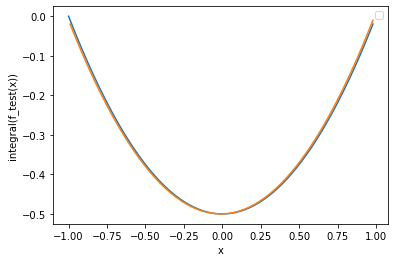

In [11]:
plt.xlabel('x')
plt.ylabel('integral(f_test(x))')
plt.legend('scipy, torch')
plt.plot(x_range[0:-1], integral_scipy)
plt.plot(x_range[1:-1], integral_torch)

## Testing runtime performance

#### Selecting number of steps

In [12]:
N = 100
x_test = x_range[0:N]
y_test = f_test(x_test)

In [13]:
trapz_runtime = benchmark_utils.runtime_measure(x=x_test, y=y_test, method=scipy.trapz, N_steps=N, N_average=10)

In [14]:
torch_trapz_runtime = benchmark_utils.torch_runtime_measure(x=x_test, f_n=f_x, method=integral_torch_method, N_points=N, N_average=10)

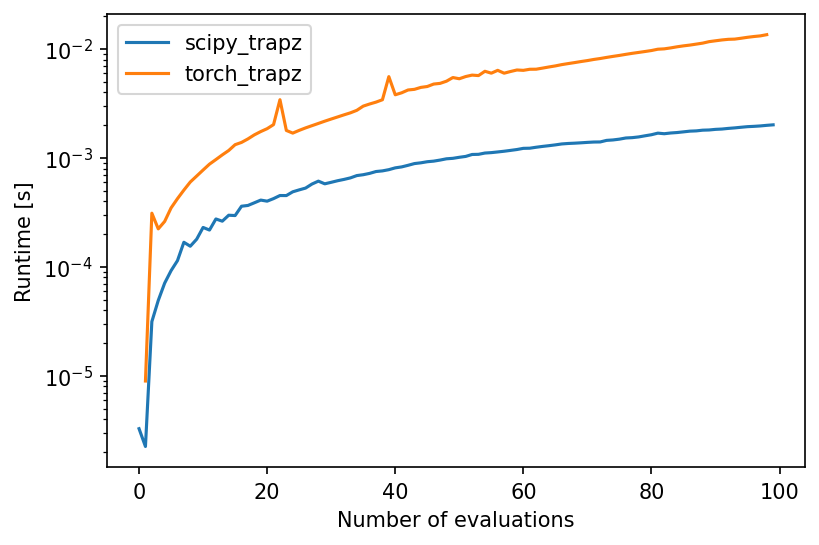

In [15]:
evals = np.arange(0, N)
plt_rt.plot_runtime([evals, evals[1:N-1]], [trapz_runtime, torch_trapz_runtime], labels=['scipy_trapz', 'torch_trapz'])